In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('xg_model.csv')

In [16]:
#Head command prints the first 5 rows
#Tail command prints the last 5 rows
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#To check overall number of rows and columns
df.shape

(8118, 25)

In [40]:
#Printing the highest value in X column
df.x.max()


99.6

In [30]:
df.y.max()

99.6

In [44]:
#Using this command we can view all the columns present in the dataset
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'OwnGoal',
       'OtherBodyPart'],
      dtype='object')

In [46]:
df.OwnGoal.value_counts()

OwnGoal
True    27
Name: count, dtype: int64

In [65]:
#Dropping the own goals columns
df.drop('OwnGoal',axis=1,inplace=True)

In [74]:
df.shape
#After removing OwnGoal,DirectFreekick,DirectCorner no of rows and columns have reduced

(8091, 22)

In [86]:
#Is goal tells us how many shots ended up as goals and not as goals
#False means no goals
#True means goals
df.is_goal.value_counts()

is_goal
False    7097
True      994
Name: count, dtype: int64

<Axes: xlabel='x', ylabel='y'>

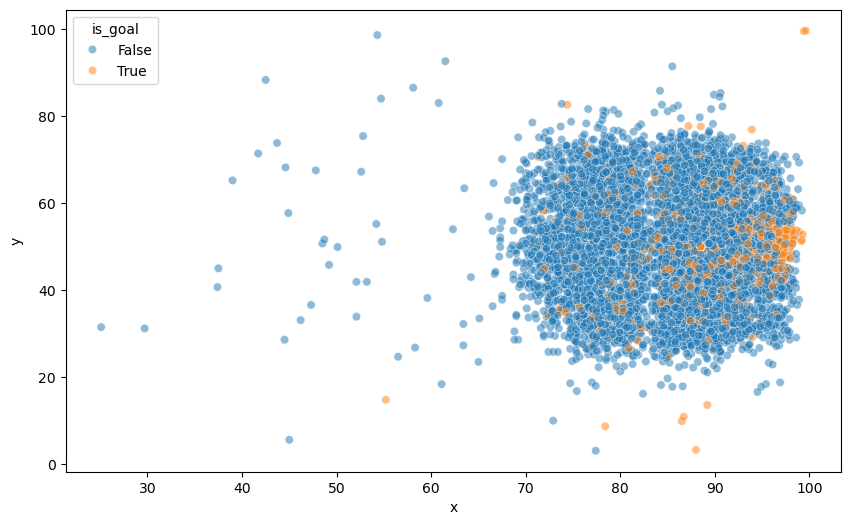

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(x='x', y='y', data=df, hue='is_goal', alpha=.5)

In [96]:
#We use the isna command to check all the null values present in each columns
df.isna().sum()

x                  0
y                  0
is_goal            0
period             0
Assisted           0
Zone               0
IndividualPlay     0
RegularPlay        0
LeftFoot           0
RightFoot          0
FromCorner         0
FirstTouch         0
Head               0
BigChance          0
SetPiece           0
Volley             0
FastBreak          0
ThrowinSetPiece    0
Penalty            0
OneOnOne           0
KeyPass            0
OtherBodyPart      0
dtype: int64

In [98]:
#We used the fillna command to fill all null values with 0
df.fillna(0 , inplace=True)

In [100]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted            object
Zone                object
IndividualPlay      object
RegularPlay         object
LeftFoot            object
RightFoot           object
FromCorner          object
FirstTouch          object
Head                object
BigChance           object
SetPiece            object
Volley              object
FastBreak           object
ThrowinSetPiece     object
Penalty             object
OneOnOne            object
KeyPass             object
OtherBodyPart       object
dtype: object

In [104]:
#astype is a command used to change all the datatypes to its correct datatype form
df = df.astype({
    'x' : float,
    'y' : float,
    'is_goal' : bool,
    'period' : str,
    'Assisted' : bool,
    'Zone' : str,
    'IndividualPlay' : bool,
    'RegularPlay' : bool,
    'LeftFoot' : bool,
    'RightFoot' : bool,
    'FromCorner' : bool,
    'FirstTouch' : bool,
    'Head' : bool,
    'BigChance' : bool,
    'SetPiece' : bool,
    'Volley' : bool,
    'FastBreak' : bool,
    'ThrowinSetPiece' : bool,
    'Penalty' : bool,
    'OneOnOne' : bool,
    'KeyPass' : bool,
    'OtherBodyPart' : bool})

In [124]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted              bool
Zone                object
IndividualPlay        bool
RegularPlay           bool
LeftFoot              bool
RightFoot             bool
FromCorner            bool
FirstTouch            bool
Head                  bool
BigChance             bool
SetPiece              bool
Volley                bool
FastBreak             bool
ThrowinSetPiece       bool
Penalty               bool
OneOnOne              bool
KeyPass               bool
OtherBodyPart         bool
dtype: object

In [126]:
#Using Feature Engineering to create a new column called Shot Distance
df['shot_distance']=np.sqrt((df['x'] - 100)**2 + (df['y'] - 50)**2)

In [128]:
df.shot_distance

0       19.266551
1       33.077636
2       22.141590
3       11.636151
4       16.323296
          ...    
8113    20.999048
8114     7.665507
8115    16.697305
8116    10.572133
8117    15.686937
Name: shot_distance, Length: 8091, dtype: float64

In [132]:
#Compare with previous dtypes,we can see that a new column as been added
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted              bool
Zone                object
IndividualPlay        bool
RegularPlay           bool
LeftFoot              bool
RightFoot             bool
FromCorner            bool
FirstTouch            bool
Head                  bool
BigChance             bool
SetPiece              bool
Volley                bool
FastBreak             bool
ThrowinSetPiece       bool
Penalty               bool
OneOnOne              bool
KeyPass               bool
OtherBodyPart         bool
shot_distance      float64
dtype: object

<Axes: >

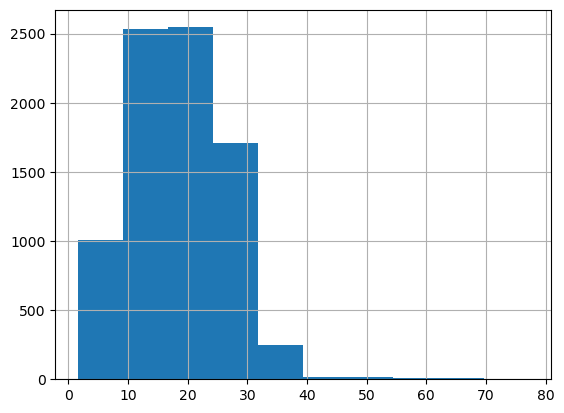

In [136]:
df['shot_distance'].hist()

In [140]:
#Describe command prints the percentile values and also the min and max values
df['shot_distance'].describe()

count    8091.000000
mean       18.495064
std         8.011289
min         1.581139
25%        12.061300
50%        18.380696
75%        24.200207
max        77.150891
Name: shot_distance, dtype: float64

In [142]:
df.period.value_counts()

period
SecondHalf    4333
FirstHalf     3758
Name: count, dtype: int64

In [146]:
df=pd.get_dummies(df, columns=['period','Zone'])

In [150]:
#we can see that through the getdummies command we have created 2 separate columns called 'period_FirstHalf' and 'period_SecondHalf'
df.columns

Index(['x', 'y', 'is_goal', 'Assisted', 'IndividualPlay', 'RegularPlay',
       'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch', 'Head',
       'BigChance', 'SetPiece', 'Volley', 'FastBreak', 'ThrowinSetPiece',
       'Penalty', 'OneOnOne', 'KeyPass', 'OtherBodyPart', 'shot_distance',
       'period_FirstHalf', 'period_SecondHalf', 'Zone_Back', 'Zone_Center',
       'Zone_Left', 'Zone_Right'],
      dtype='object')

In [152]:
df.period_FirstHalf.value_counts()

period_FirstHalf
False    4333
True     3758
Name: count, dtype: int64

In [154]:
df.period_SecondHalf.value_counts()

period_SecondHalf
True     4333
False    3758
Name: count, dtype: int64

In [156]:
X = df.drop('is_goal', axis=1)
y = df['is_goal']

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

In [160]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [162]:
model = LogisticRegression(max_iter=1000)

In [164]:
model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [168]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [170]:
y_pred_proba[:10]

array([0.07206945, 0.35053432, 0.03630731, 0.03748669, 0.09932368,
       0.03813244, 0.03461905, 0.0487783 , 0.04592472, 0.03809074])

In [174]:
final_df = X_test.copy()
final_df['goal_probability'] = y_pred_proba

In [184]:
final_df.iloc[830]

x                         79.1
y                         70.3
Assisted                 False
IndividualPlay           False
RegularPlay              False
LeftFoot                  True
RightFoot                False
FromCorner               False
FirstTouch               False
Head                     False
BigChance                False
SetPiece                 False
Volley                   False
FastBreak                False
ThrowinSetPiece          False
Penalty                  False
OneOnOne                 False
KeyPass                  False
OtherBodyPart            False
shot_distance        29.135889
period_FirstHalf          True
period_SecondHalf        False
Zone_Back                False
Zone_Center               True
Zone_Left                False
Zone_Right               False
goal_probability       0.06256
Name: 1808, dtype: object

In [186]:
final_df.sort_values(by='goal_probability', ascending = False).head()

,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,...,KeyPass,OtherBodyPart,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,goal_probability
3671,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.828118
6619,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.828118
1323,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.828118
381,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.828118
695,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,True,False,False,True,False,False,0.824610


In [194]:
#Log loss measures how well the model is able to predict the probability of classes
#The lower the log loss, the better for predictions
log_loss(y_test, y_pred_proba)

0.2694067358934504

In [198]:
#Roc auc score tells us how well the model is able to sperate the classes
#The higher the score the better
roc_auc_score(y_test, y_pred_proba)

0.8113240418118468

In [204]:
#brier score loss measures the squared mean difference between predicted probability and actual outcomes
#Similar to variance!
brier_score_loss(y_test, y_pred_proba)

0.077266565697547

In [206]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='opta')

In [210]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['red', 'yellow', 'green']

cmap = LinearSegmentedColormap.from_list('my_colormap',colors)

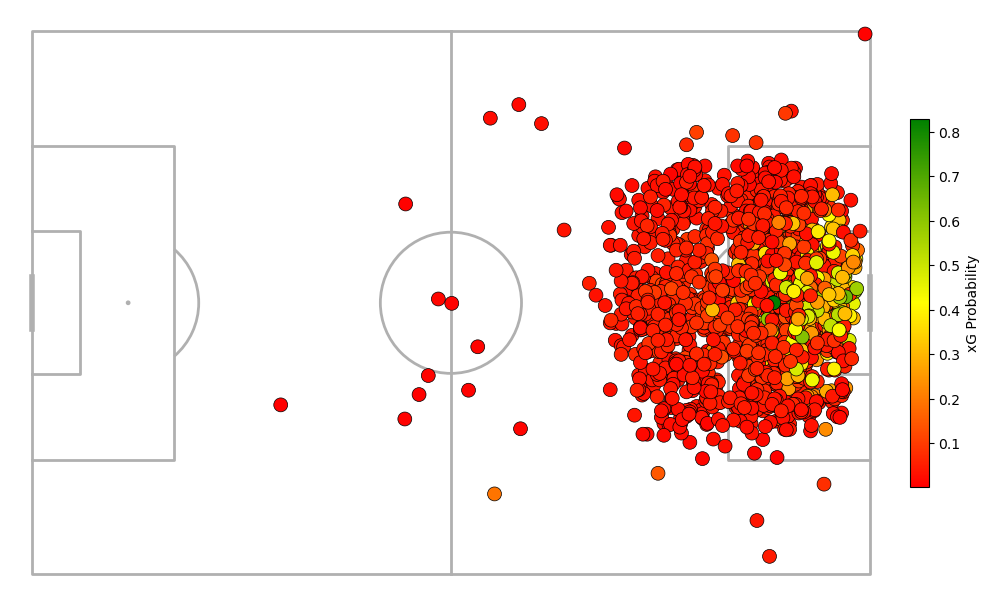

In [214]:
#PLotting the Pitch Graph
fig, ax = pitch.draw(figsize=(10,8))

sc = pitch.scatter(
    final_df['x'],
    final_df['y'],
    c = final_df['goal_probability'],
    cmap = cmap,
    edgecolors='black',
    linewidth=.5,
    s=100,
    ax=ax
)

cbar = plt.colorbar(sc, ax=ax, orientation='vertical' , fraction=.02, pad=.02)
cbar.set_label('xG Probability')
